# **Table of contents:**
* Gathering
* Assessing
* Observations
* Cleaning
* Analyzations and Visualizations


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
from io import BytesIO
import seaborn as sns 
import json

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_tarchive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## Gathering

In [2]:
#loading the twitter archive data 
df_tarchive = pd.read_csv('project data/twitter_archive_enhanced.csv')

In [3]:
#downloading the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('project data/',url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


In [4]:
#loading image predictions
df_image_predictions = pd.read_csv('project data/image-predictions.tsv',sep ='\t')

In [5]:
if not os.path.exists('project data/tweet_json.txt'):
    get_twitter_data(df_tarchive, 'project data/tweet_json.txt')

In [6]:
with open('project data/tweet_json.txt') as file:
    df_tweet_json = pd.read_json(file, lines= True, encoding = 'utf-8')

## Assessing

In [7]:
df_tarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_tarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_tarchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_tarchive[df_tarchive.rating_numerator < 10 ].loc[:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [11]:
df_tarchive[df_tarchive.rating_numerator > 15 ].loc[:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [12]:
df_tarchive[df_tarchive.rating_denominator > 10].loc[:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [13]:
df_tarchive[df_tarchive.rating_denominator < 10].loc[:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [14]:
list(df_tarchive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [15]:
df_tarchive.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [16]:
df_tarchive.duplicated().value_counts()

False    2356
dtype: int64

In [17]:
df_tarchive.source.isnull().value_counts()

False    2356
Name: source, dtype: int64

In [18]:
df_tarchive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Bailey        7
Buddy         7
Daisy         7
Toby          7
Jax           6
Rusty         6
Leo           6
Bella         6
Dave          6
Koda          6
Scout         6
Jack          6
Stanley       6
Milo          6
Oscar         6
Oakley        5
           ... 
Fwed          1
Amélie        1
Brownie       1
Ozzie         1
Pluto         1
Orion         1
Tycho         1
Jim           1
Storkson      1
Rhino         1
Terrenth      1
Deacon        1
Mac           1
Lizzie        1
light         1
Eriq          1
Huxley        1
Stuart        1
Adele         1
Dietrich      1
Ralphus       1
Blipson       1
Bilbo         1
Dook          1
Ralphie       1
Aubie         1
Carll         1
Lillie        1
Maxwell       1
Gordon        1
Name: name, Length: 957,

In [19]:
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [22]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
df_image_predictions.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [25]:
df_tweet_json.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [26]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [27]:
df_tweet_json.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
es        1
ro        1
et        1
eu        1
Name: lang, dtype: int64

In [28]:
df_tweet_json.entities.head(5)

0    {'hashtags': [], 'symbols': [], 'user_mentions...
1    {'hashtags': [], 'symbols': [], 'user_mentions...
2    {'hashtags': [], 'symbols': [], 'user_mentions...
3    {'hashtags': [], 'symbols': [], 'user_mentions...
4    {'hashtags': [{'text': 'BarkWeek', 'indices': ...
Name: entities, dtype: object

In [29]:
df_tweet_json.id.head(5)        

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

## Observations

### Quality Issues:
* rating_denominator should be equal to 10 .
* rating_numerator should be more than 10 (the rating can't be less than 1) and less than 15 (15 is the highest rating ever given to a dog on weratedogs).
* rating_numerator,rating_denominator columns should be of a float type rather than int.
* missing values in the doggo, floofer, pupper, puppo,name columns should be written as NaN not none  .
* timestamp is given an object (String) type istead of datetime.
* Many columns are nearly all null values so they should be removed.
* should rename id column in df_tweet_json to match the column names in the other 2 datasets.
* Remove img_num as it is not useful.
* we are only intrested in the original tweets so retweets are not important.
* we are only intrested in the original tweets so replies are not important.
* The extended_entities , expanded_urls have null values.
* Some columns are not useful or contain mostly NaN values.

### Tidiness Issues:
* doggo,floofer, pupper, puppo can be in one column.
* We can combine all of the data into one set.
* Replace rating_denominator and rating_numerator columns with a single rating column (Rating = rating_numerator/ rating_denominator)

## Cleaning

### We will make a copy of each dataset before cleaning:

In [30]:
df_tarchive_clean = df_tarchive.copy()
df_image_predictions_clean =  df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy() 

### Then, we will tackle each issue that has been stated in the observations section as follows:

In [31]:
df_tarchive_clean[df_tarchive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [32]:
new_ratings = df_tarchive_clean[df_tarchive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_ratings

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [33]:
df_tarchive_clean.loc[new_ratings.index, 'rating_numerator'] = new_ratings.values

In [34]:
# Set the correct value for the rating_denominator
df_tarchive_clean['rating_denominator'] = 10

In [35]:
# make sure the rating_denominator have been set to the correct value 
df_tarchive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,9,10,Larry,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
1214,715200624753819648,NaN,NaN,2016-03-30 15:34:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Michelangelope. He's half coffee cup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715200624...,12,10,Michelangelope,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None


In [36]:
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [37]:
# Convert rating_numerator coloumn from object to float type
df_tarchive_clean.rating_numerator = df_tarchive_clean.rating_numerator.astype('float').round()

In [38]:
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [39]:
# Remove the unwanted values from the rating_numerator coloumn
df_tarchive_clean = df_tarchive_clean[df_tarchive_clean.rating_numerator >= 10]
df_tarchive_clean = df_tarchive_clean[df_tarchive_clean.rating_numerator <= 15]

In [40]:
df_tarchive_clean.replace('None',np.nan,inplace=True)

In [41]:
# Change timestamp format to datetime
df_tarchive_clean['timestamp'] = pd.to_datetime(df_tarchive_clean['timestamp'])                 

In [42]:
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1896 non-null int64
in_reply_to_status_id         60 non-null float64
in_reply_to_user_id           60 non-null float64
timestamp                     1896 non-null datetime64[ns]
source                        1896 non-null object
text                          1896 non-null object
retweeted_status_id           172 non-null float64
retweeted_status_user_id      172 non-null float64
retweeted_status_timestamp    172 non-null object
expanded_urls                 1852 non-null object
rating_numerator              1896 non-null float64
rating_denominator            1896 non-null int64
name                          1311 non-null object
doggo                         92 non-null object
floofer                       10 non-null object
pupper                        214 non-null object
puppo                         29 non-null object
dtypes: datetime64[ns](1), fl

In [43]:
# Remove coloumns that are a majority of null values 
df_tarchive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],1,inplace=True)

In [44]:
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2350
Data columns (total 12 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null datetime64[ns]
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1852 non-null object
rating_numerator      1896 non-null float64
rating_denominator    1896 non-null int64
name                  1311 non-null object
doggo                 92 non-null object
floofer               10 non-null object
pupper                214 non-null object
puppo                 29 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 192.6+ KB


In [45]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [46]:
# Droping Columns with majority null values 
df_tweet_json_clean.drop(['contributors','coordinates','geo','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','place','quoted_status','quoted_status_id','quoted_status_id_str','retweeted_status'],1,inplace=True)    

In [47]:
df_tweet_json_clean.drop(['id_str','is_quote_status','truncated','entities','extended_entities','retweeted','lang','display_text_range','favorited','possibly_sensitive','possibly_sensitive_appealable'],1,inplace=True )

In [48]:
df_tweet_json_clean = df_tweet_json_clean.rename(columns={'id':'tweet_id'})

In [49]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
full_text         2354 non-null object
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
source            2354 non-null object
user              2354 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 128.8+ KB


In [50]:
df_tweet_json_clean.dropna(inplace=True)

In [51]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 7 columns):
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
full_text         2354 non-null object
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
source            2354 non-null object
user              2354 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 147.1+ KB


In [52]:
df_tweet_json_clean.sample(5)

,created_at,favorite_count,full_text,tweet_id,retweet_count,source,user
248,2017-03-24 16:10:40,25225,This is Pickles. She's a silly pupper. Thinks ...,845306882940190720,6039,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1790,2015-12-17 03:48:51,1477,This dog gave up mid jump. 9/10 https://t.co/K...,677334615166730240,328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1759,2015-12-20 20:38:24,3155,Exotic pup here. Tail long af. Throat looks sw...,678675843183484930,1680,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2054,2015-11-30 15:59:17,426,Tfw she says hello from the other side. 9/10 h...,671357843010908160,157,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2312,2015-11-17 19:35:19,449,This is a golden Buckminsterfullerene named Jo...,666701168228331520,234,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [53]:
df_image_predictions_clean.drop(['img_num'],1,inplace=True)

In [54]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


In [55]:
df_tarchive_clean.dropna(subset=['expanded_urls'],inplace=True)

In [56]:
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852 entries, 0 to 2350
Data columns (total 12 columns):
tweet_id              1852 non-null int64
timestamp             1852 non-null datetime64[ns]
source                1852 non-null object
text                  1852 non-null object
expanded_urls         1852 non-null object
rating_numerator      1852 non-null float64
rating_denominator    1852 non-null int64
name                  1311 non-null object
doggo                 89 non-null object
floofer               10 non-null object
pupper                212 non-null object
puppo                 28 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 188.1+ KB


In [57]:
# Join the doggo, floofer, pupper, puppo in one column
df_tarchive_clean['Dog_Type'] = df_tarchive_clean[['doggo', 'puppo','pupper','floofer']].stack().groupby(level=0).agg(','.join)

In [58]:
df_tarchive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dog_Type
1804,676946864479084545,2015-12-16 02:08:04,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,https://twitter.com/dog_rates/status/676946864...,12.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1846,675822767435051008,2015-12-12 23:41:18,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,https://twitter.com/dog_rates/status/675822767...,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1094,736736130620620800,2016-05-29 01:49:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,https://twitter.com/dog_rates/status/736736130...,13.0,10,Chadrick,NaN,NaN,NaN,NaN,NaN
1329,705898680587526145,2016-03-04 23:32:15,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,https://twitter.com/dog_rates/status/705898680...,10.0,10,Max,NaN,NaN,NaN,NaN,NaN
487,814153002265309185,2016-12-28 16:56:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Oshie. He's ready to party. Bought tha...,https://twitter.com/dog_rates/status/814153002...,12.0,10,Oshie,NaN,NaN,NaN,NaN,NaN


In [59]:
df_tarchive_clean['dog_rating'] = (df_tarchive_clean['rating_numerator'] *10)  / df_tarchive_clean['rating_denominator']

In [60]:
df_tarchive_clean.drop(['doggo','floofer','pupper','puppo','rating_numerator','rating_denominator'],1,inplace = True)

In [61]:
# Merging the datasets into one final dataset
df_final = pd.merge(df_tarchive_clean, df_image_predictions_clean, on='tweet_id')

In [62]:
df_final.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,Dog_Type,dog_rating,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1256,682242692827447297,2015-12-30 16:51:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,https://twitter.com/dog_rates/status/682242692...,Samson,NaN,11.0,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
649,771500966810099713,2016-09-02 00:12:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,https://twitter.com/dog_rates/status/771500966...,Dakota,NaN,12.0,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,Labrador_retriever,0.833952,True,golden_retriever,0.103223,True,soccer_ball,0.012094,False
718,759159934323924993,2016-07-29 22:53:27,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,https://twitter.com/dog_rates/status/670319130...,NaN,NaN,11.0,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
288,829141528400556032,2017-02-08 01:35:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He goes from sneaky tongue sl...,https://twitter.com/dog_rates/status/829141528...,Malcolm,NaN,12.0,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False
1247,683357973142474752,2016-01-02 18:43:31,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",https://twitter.com/dog_rates/status/683357973...,NaN,NaN,10.0,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True


In [63]:
df_final.to_csv(r'project data/twitter_archive_master.csv')

## Visualization

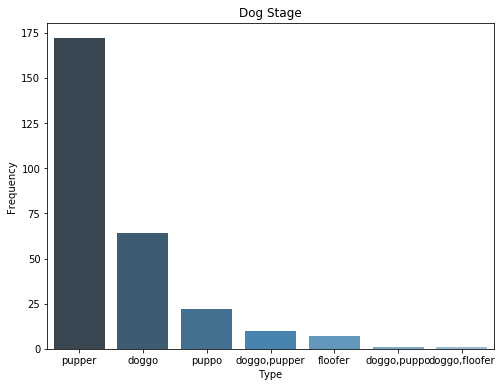

In [64]:
# lets take a look at Dog Persona as a bar chart
n = df_final.Dog_Type.value_counts()
x= n.index
y= n.values
fig, ax = plt.subplots(figsize=(8, 6))
per = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Type', ylabel='Frequency', title='Dog Stage')
plt.show()

([<matplotlib.patches.Wedge at 0x7ff5bb995128>,
 [Text(-0.407951,1.02156,'pupper'),
  Text(-0.0934547,-1.09602,'doggo'),
  Text(0.854991,-0.692091,'puppo'),
  Text(1.045,-0.343476,'doggo,pupper'),
  Text(1.09145,-0.136877,'floofer'),
  Text(1.09936,-0.0374199,'doggo,puppo'),
  Text(1.09993,-0.0124756,'doggo,floofer')],
 [Text(-0.185432,0.464343,'62.1%'),
  Text(-0.0424794,-0.498192,'23.1%'),
  Text(0.388632,-0.314587,'7.9%'),
  Text(0.475,-0.156126,'3.6%'),
  Text(0.496114,-0.0622166,'2.5%'),
  Text(0.499711,-0.017009,'0.4%'),
  Text(0.499968,-0.00567071,'0.4%')])

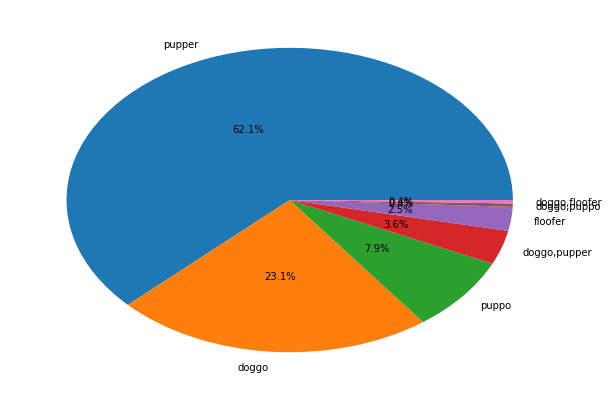

In [65]:
#lets take a look at Dog persona as a pie chart 
n = df_final.Dog_Type.value_counts()
x= n.index
y= n.values
pie, ax = plt.subplots(figsize=[10,7])
labels = n.keys()
plt.pie(y, autopct="%.1f%%", labels=labels, pctdistance=0.5)

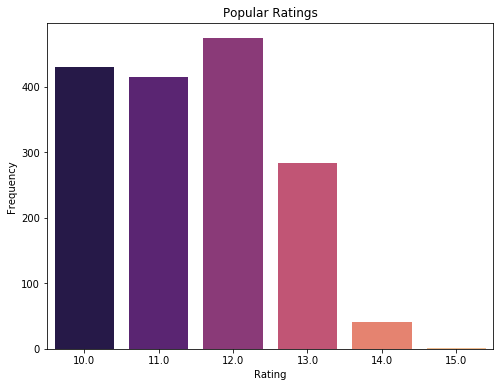

In [66]:
# Now lets take a look at the most popular Dog names
n = df_final['dog_rating'].value_counts()
x= n.index
y= n.values
fig, ax = plt.subplots(figsize=(8, 6))
nm = sns.barplot(x, y, palette='magma', ax=ax)
ax.set(xlabel='Rating', ylabel='Frequency', title='Popular Ratings')
plt.show()

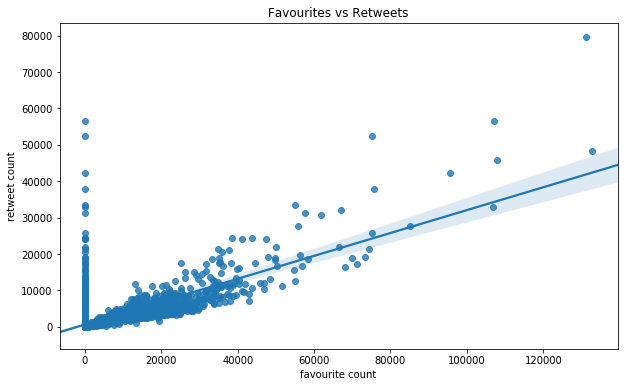

In [67]:
# Now lets plot a 
n = df_tweet_json_clean.favorite_count
m = df_tweet_json_clean.retweet_count
fig, ax = plt.subplots(figsize=(10, 6))
pg = sns.regplot(x=n, y=m,data=df_tweet_json_clean)
ax.set(xlabel='favourite count', ylabel='retweet count', title='Favourites vs Retweets')
plt.show()